# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [40]:
from sklearn import datasets
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [33]:
np.unique(iris.target)

array([0, 1, 2])

In [34]:
#建立不同的群數和其他參數
estimators=[('Cluster=5',KMeans(n_clusters=5)),
           ('Cluster=3',KMeans(n_clusters=3)),
           ('Cluster=3_bad_init',KMeans(n_clusters=3,n_init=5,init='random'))]
#init是設定起使的方法
#而n_init則是cluster seed的次數，越多次效果會收斂

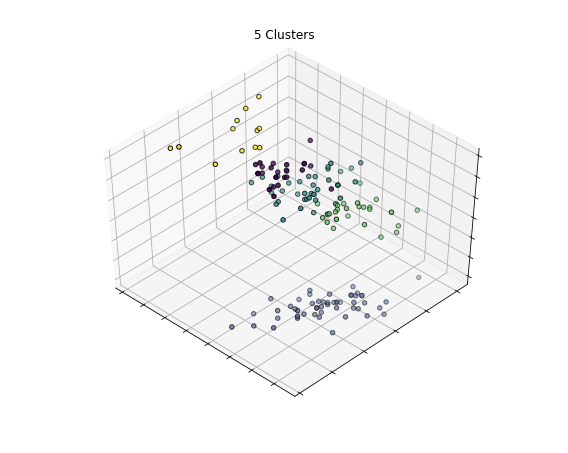

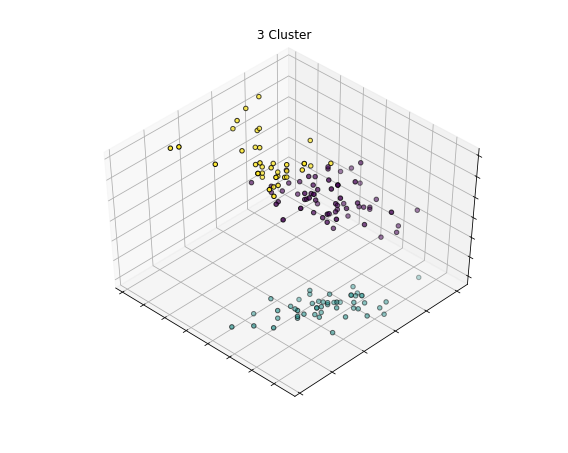

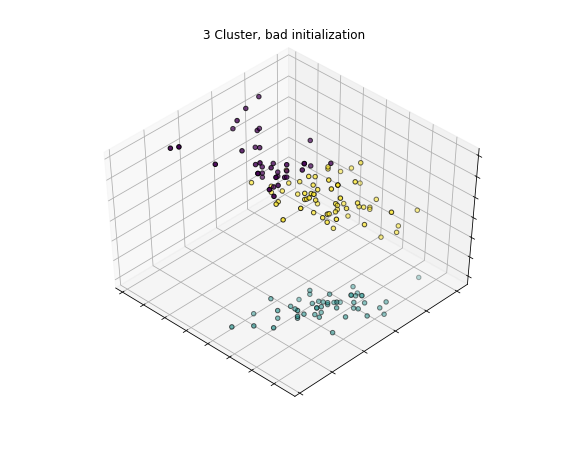

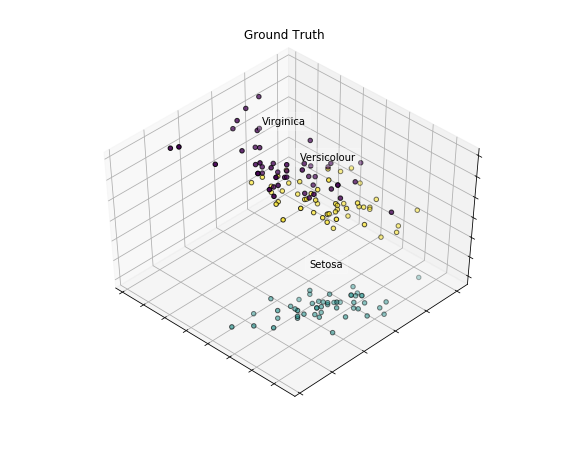

In [44]:
#查看測驗結果
fignum=1
title=['5 Clusters','3 Cluster','3 Cluster, bad initialization']

for name,est in estimators:
    fig=plt.figure(fignum,figsize=(8,6))
    ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)
    
    #fit data
    est.fit(X)
    labels=est.labels_
    
    #取三個特徵來做圖
    ax.scatter(X[:,0],X[:,1],X[:,2],c=labels.astype(np.float),edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])  #不需要顯示刻度
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(title[fignum-1])
    ax.dist=12
    fignum=fignum+1
    
#實際結果
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

cls=[('Setosa',0),('Versicolour',1),('Virginica',2)]

for name,label in cls:
#text3D的目的是要把資料的label放在圖上
#horizontalalignment是指把label放在同群資料的中間
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))


y_transform = np.choose(y, [1, 2, 0]).astype(np.float) #把原本標籤為 [0,1,2] 改成 [1,2,0]
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_transform, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12
